
# Using GeoPandas with Rasterio to sample point data

This example shows how to use GeoPandas with Rasterio.  [Rasterio](https://rasterio.readthedocs.io/en/latest/index.html) is a package for reading and writing raster data.

In this example a set of vector points is used to sample raster data at those points.


In [1]:
import geopandas
import rasterio
import matplotlib.pyplot as plt

Load the vector data
=============================

Let's open a geopackage of the points we want to use to sample the raster data


In [2]:
gdf = geopandas.read_file('data\\sample_points.gpkg')

The ``GeoDataFrame`` looks like this:

In [3]:
gdf.head()

,id,geometry
0,1,POINT (615858.1930048079 5619641.60641626)
1,2,POINT (621640.7523066753 5613571.516541371)
2,3,POINT (622854.7702816529 5605424.816972442)


Open the raster data
=============================

Use ``rasterio`` to open the raster data to be sampled

In [4]:
src = rasterio.open('data\\s2a_l2a_iow.tif')

Let's see the raster data with the point data overlaid.



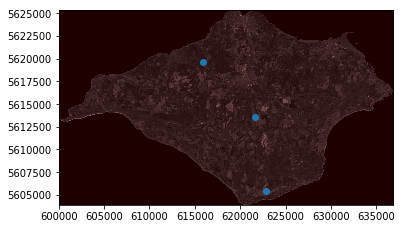

In [5]:
from rasterio.plot import show

fig, ax = plt.subplots()

# transform rasterio plot to real world coords
extent=[src.bounds[0], src.bounds[2], src.bounds[1], src.bounds[3]]
ax = rasterio.plot.show(src, extent=extent, ax=ax, cmap='pink')

gdf.plot(ax=ax)

Sampling the data
===============
Rasterio requires a list of the coordinates in x,y format rather than as the points that are in the geomentry column.

This can be achived using the code below

In [6]:
coord_list = [(x,y) for x,y in zip(gdf['geometry'].x , gdf['geometry'].y)]

Carry out the sampling of the data and store the results in a new column called `value`.  Note that if the image has more than one band, a value is returned for each band.

In [7]:
gdf['value'] = [x for x in src.sample(coord_list)]
gdf.head()

,id,geometry,value
0,1,POINT (615858.1930048079 5619641.60641626),"[215, 468, 204, 4795]"
1,2,POINT (621640.7523066753 5613571.516541371),"[742, 1152, 1659, 2221]"
2,3,POINT (622854.7702816529 5605424.816972442),"[1223, 1638, 1811, 3194]"
